In [1]:
path = ('Path_to_your_directory')
setwd(path)

In [2]:
# Turning all the warnings off
options(warn=-1)

In [3]:
# Reading data 
data = read.csv('titanic.txt', header = TRUE)
head(data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [4]:
summary(data)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [5]:
dim(data)

[1] 891  12

In [6]:
# Replacing NA values by previous value
require(zoo)
data = transform(data, Age = na.locf(Age))
summary(data)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.00  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.58  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                               
     Sib

In [7]:
library(ggplot2)

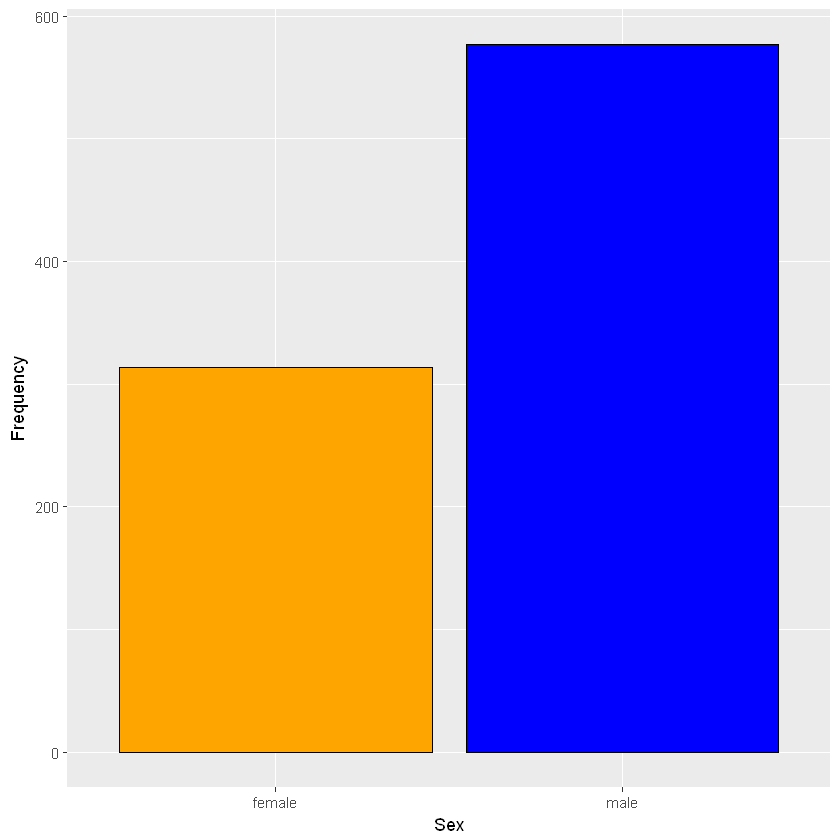

In [8]:
# Total passengers Male vs Female
theme1 = theme(legend.position = 'none')
(ggplot(data, aes(x = Sex, fill = Sex)) 
  + geom_bar(stat = 'count', color = 'black')
  + scale_fill_manual(values = c('orange', 'blue'))
  + labs(x = 'Sex', y = 'Frequency')
  + theme1
  )

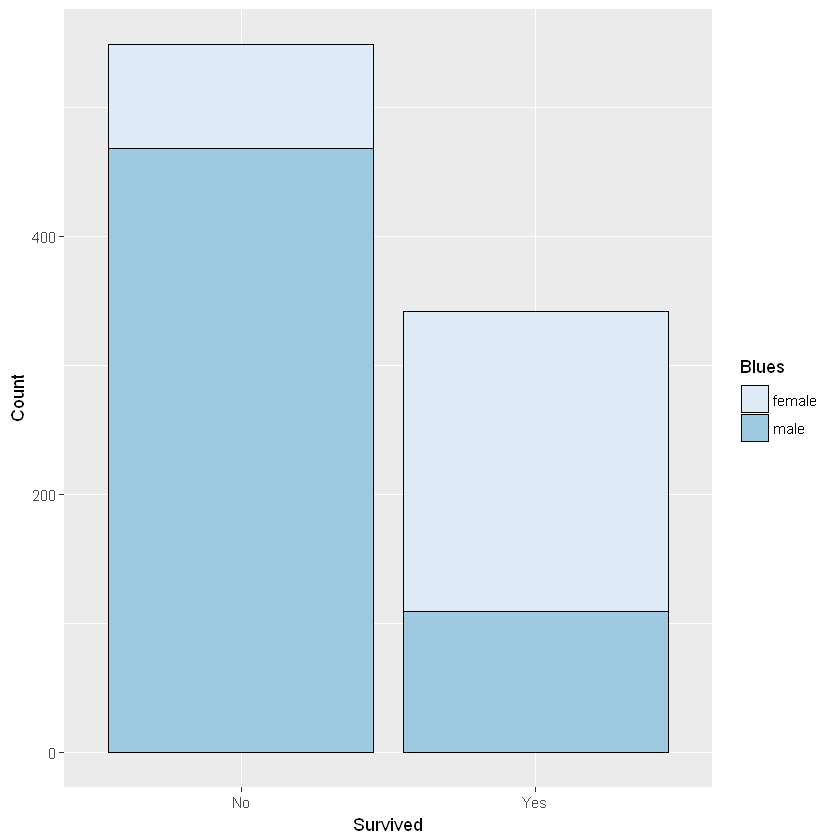

In [9]:
# Survived Passengers Male vs Female
data$Survived[data$Survived == 1] = 'Yes'
data$Survived[data$Survived == 0] = 'No'
(ggplot(data, aes(x = Survived, fill = Sex)) 
  + geom_bar(stat = 'count', color = 'black')
  + scale_fill_brewer('Blues')
  + labs(y = 'Count')
  )

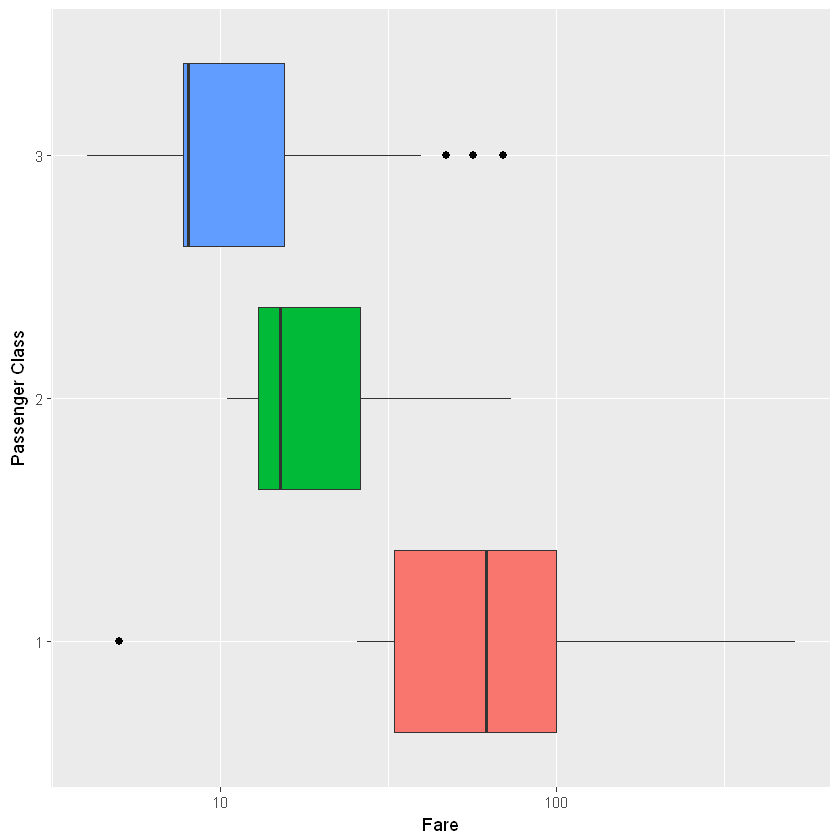

In [10]:
# Box plot of Passenger Class and fare
(ggplot(data, aes(x = factor(Pclass), y = Fare, fill = factor(Pclass)))
  + geom_boxplot(outlier.color = 'black', outlier.size =  2)
  + scale_y_log10()
  + labs(x = 'Passenger Class')
  + coord_flip()
  + theme1
  )

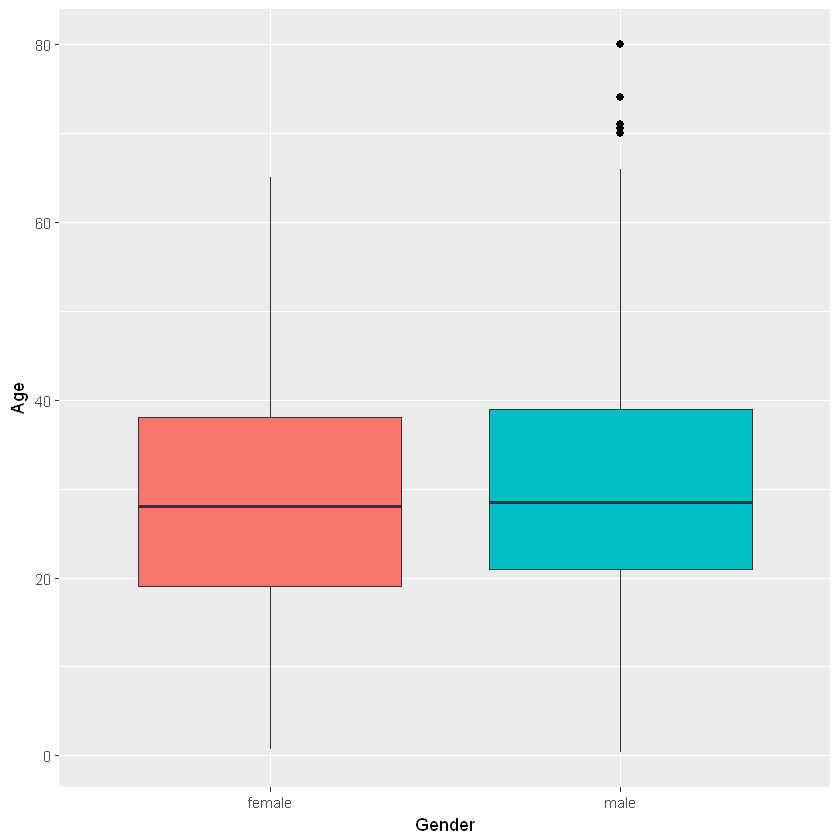

In [11]:
# Box plot Age vs Gender
(ggplot(data, aes(x = factor(Sex), y = Age, fill = Sex))
  + geom_boxplot(outlier.color = 'black', outlier.size =  2)
  + labs(x = 'Gender')
  + theme1
)

In [12]:
# Reading another set of data
counties = read.csv('counties.csv', header = TRUE)

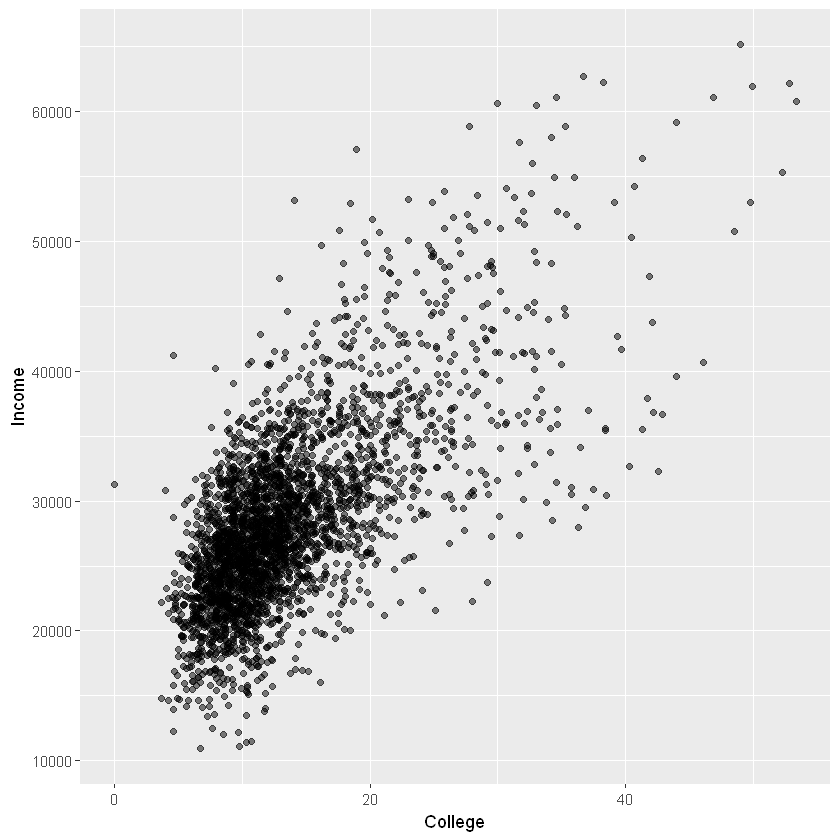

In [13]:
# Relationship between college and income
(ggplot(counties, aes(x = college, y = income))
  + geom_point(alpha = 0.5, pch = 19)
  + scale_color_manual(values = c('darkblue'))
  + labs(x = 'College', y = 'Income')
  )

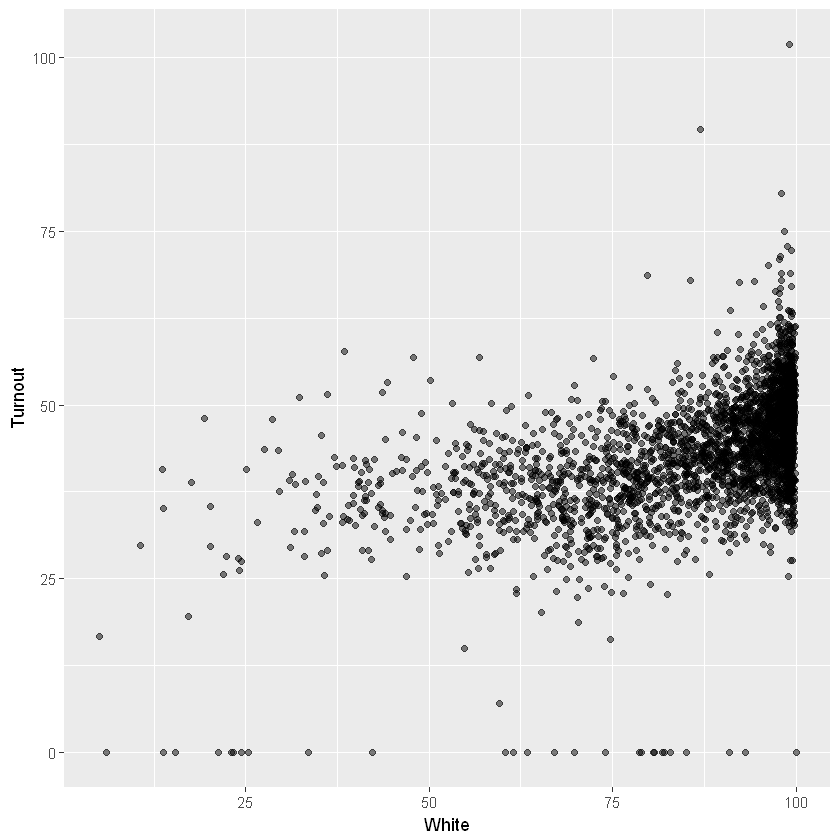

In [14]:
# Relationship between white and turnout
(ggplot(counties, aes(x = white, y = turnout))
  + geom_point(alpha = 0.5, pch = 19)
  + scale_color_manual(values = c('darkblue'))
  + labs(x = 'White', y = 'Turnout')
)

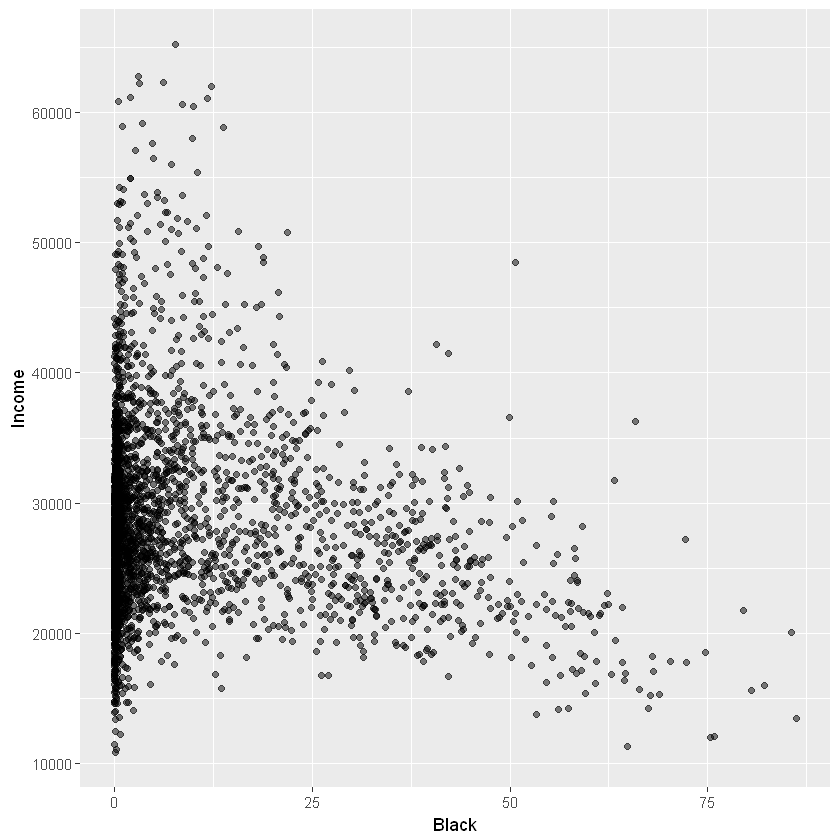

In [15]:
# Black population income
(ggplot(counties, aes(x = black, y = income))
  + geom_point(alpha = 0.5, pch = 19)
  + scale_color_manual(values = c('darkblue'))
  + labs(x = 'Black', y = 'Income')
)

In [16]:
# Map
library(maps)

In [17]:
usa = map_data('state')
str(usa)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [18]:
# let's add a theme to our plot
my_theme = theme(axis.text.x = element_blank(), 
                 axis.text.y = element_blank(),
                 axis.title.x = element_blank(),
                 axis.title.y = element_blank(),
                 panel.grid.major = element_blank(),
                 panel.grid.minor = element_blank(),
                 panel.border = element_blank(),
                 legend.position = 'none'
)

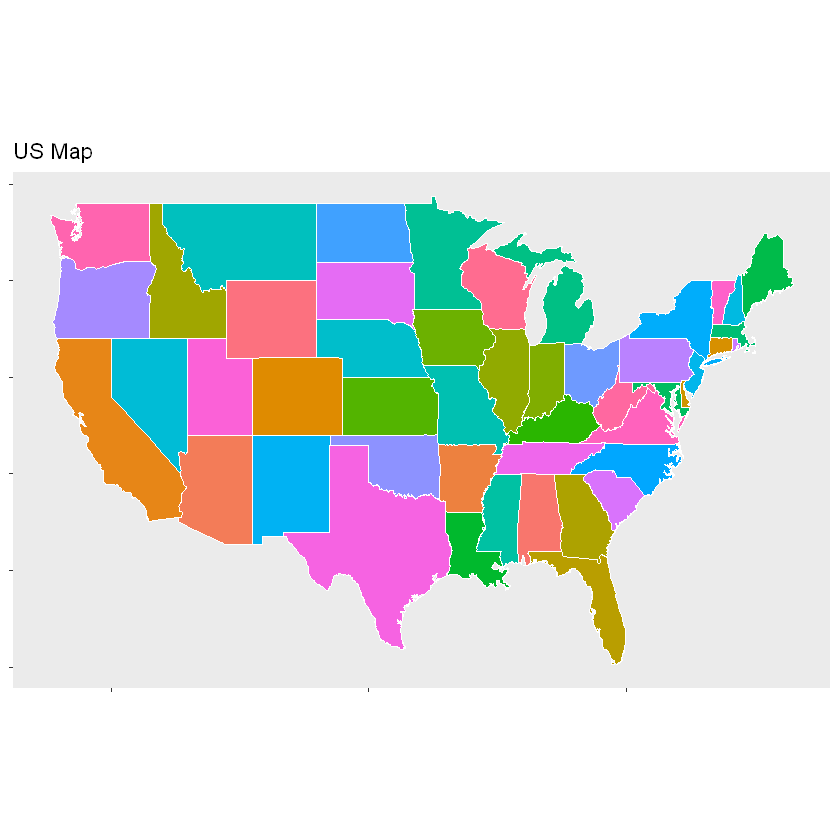

In [19]:
# Plotting USA map
(ggplot(usa, aes(x = long, y = lat, fill = region, group = group))
  + geom_polygon( color = 'white')
  + coord_fixed(1.5)  
  + my_theme
  + labs(title= 'US Map')
  )

In [20]:
head(usa)

long,lat,group,order,region,subregion
-87.46201,30.38968,1,1,alabama,NA
-87.48493,30.37249,1,2,alabama,NA
-87.52503,30.37249,1,3,alabama,NA
-87.53076,30.33239,1,4,alabama,NA
-87.57087,30.32665,1,5,alabama,NA
-87.58806,30.32665,1,6,alabama,NA


In [21]:
head(counties)

county,state,msa,pmsa,pop.density,pop,pop.change,age6574,age75,crime,college,income,farm,democrat,republican,Perot,white,black,turnout
Autauga,AL,5240,NA,61,34222,11.9,5.7,4.1,4996,14.5,32240,1.8,30.9,55.9,12.3,79.31740,20.001753,45.54088
Baldwin,AL,5160,NA,67,98280,35.4,9.2,6.0,3329,16.8,30199,1.7,26.2,56.5,16.5,86.04498,12.861213,47.28938
Barbour,AL,NA,NA,29,25417,2.0,8.2,6.4,3192,11.8,23838,2.4,46.4,42.9,9.8,55.54550,44.041389,41.03946
Bibb,AL,NA,NA,28,16576,9.2,6.7,6.0,0,4.7,23714,0.9,43.2,46.5,10.2,78.74035,20.982143,40.54054
Blount,AL,1000,NA,62,39248,10.6,7.4,5.6,2052,7.0,26323,4.7,32.9,53.8,11.8,97.83173,1.327456,42.05310
Bullock,AL,NA,NA,18,11042,3.7,8.5,7.6,3630,10.0,17796,2.6,67.7,26.0,5.5,27.49502,72.323853,43.61529


*** The region is in lowercase will fullname whereas the states name in data have abbreviated form of states.Hence converting names to state abbreviation ***

In [22]:
library(rapportools)
usa$State = state.abb[match(tocamel(usa$region, upper = TRUE, sep = ' '), state.name)]

Loading required package: reshape

Attaching package: 'rapportools'

The following objects are masked from 'package:stats':

    IQR, median, sd, var

The following objects are masked from 'package:base':

    max, mean, min, range, sum



In [23]:
# Removing 'DC' from list of states
usa = usa[!is.na(usa$State), ]

In [24]:
# Calculating total population per state
total_pop = aggregate(counties$pop, by=list(counties$state), FUN=sum)
total_pop$State = total_pop$Group.1
total_pop = total_pop[total_pop$State !='DC', ]

In [25]:
# Merging two dataframe and selecting required column only
new_data = merge(usa, total_pop, by = 'State')
# [c('long', 'lat', 'State', 'group', 'x')]

In [26]:
unique(new_data[c('State' ,'x')])

,State,x
1,AL,4040587
203,AR,2350725
515,AZ,3665228
664,CA,29760021
1180,CO,3294394
1259,CT,3287116
1350,DE,666168
1444,FL,12937926
2316,GA,6478216
2697,IA,2776755


In [27]:
my_theme2 = theme(axis.text.x = element_blank(), 
                 axis.text.y = element_blank(),
                 axis.title.x = element_blank(),
                 axis.title.y = element_blank(),
                 panel.grid.major = element_blank(),
                 panel.grid.minor = element_blank(),
                 panel.border = element_blank()
                 )

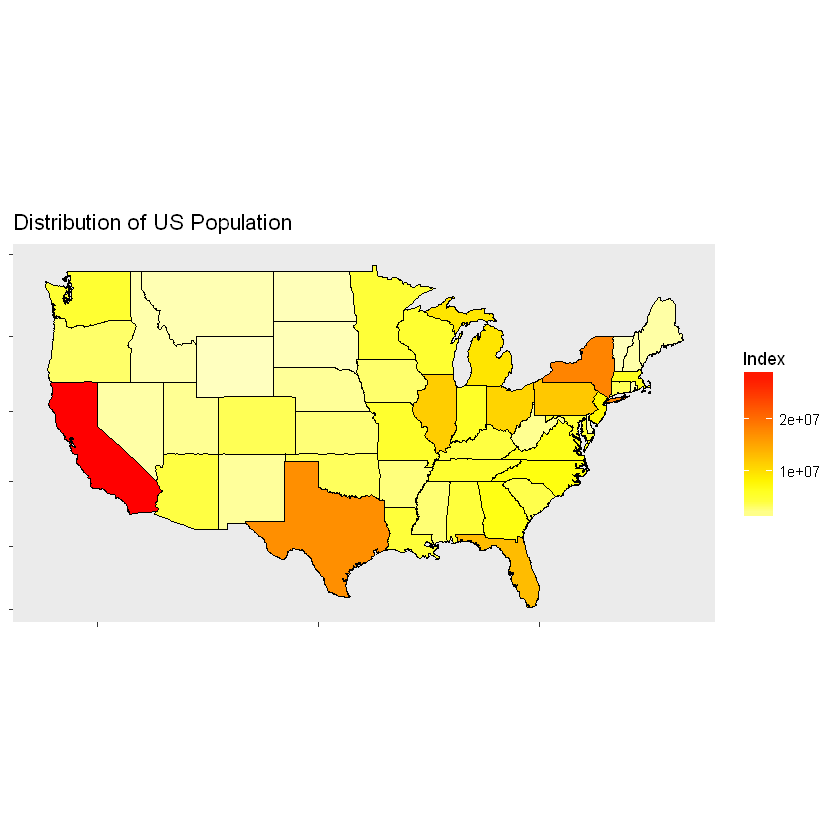

In [28]:
# Plotting average income for each US states
(ggplot(new_data, aes(x = long, y = lat, group = group))
  + geom_polygon(aes(fill = x))
  + geom_path()
  + scale_fill_gradientn(colours = rev(heat.colors(10)), na.value = 'grey90')
  + coord_map() 
  + my_theme2
  + labs(title = 'Distribution of US Population', fill = 'Index')
)

In [29]:
# Average income
avg_income = aggregate(counties$income, by=list(counties$state), FUN=mean)
avg_income$State = avg_income$Group.1
income_data = merge(usa, avg_income, by = 'State')

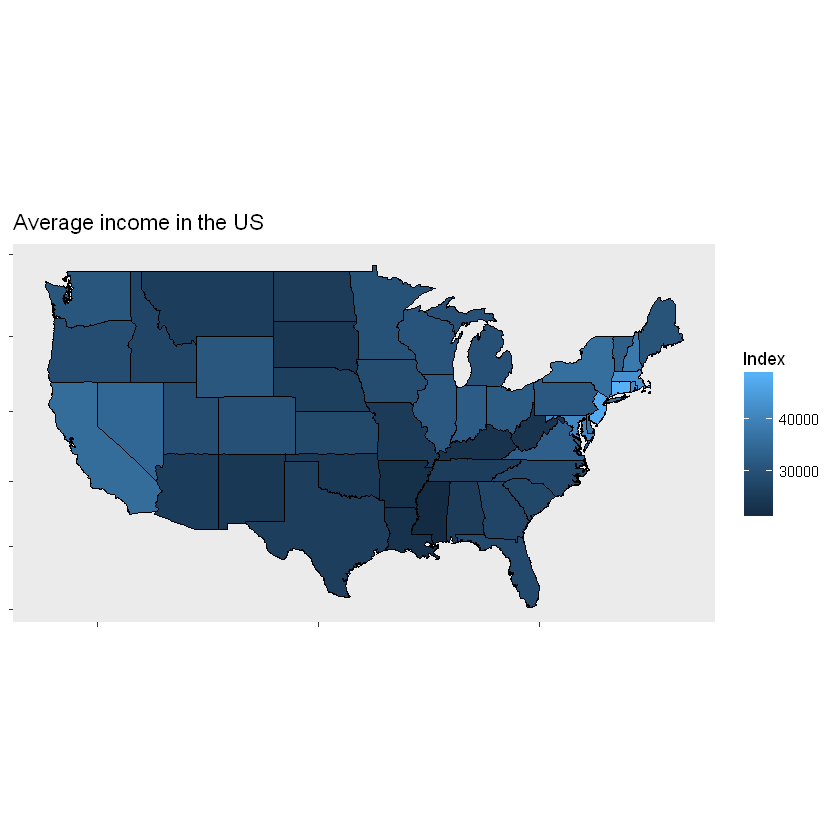

In [30]:
(ggplot(income_data, aes(x = long, y = lat, group = group))
  + geom_polygon(aes(fill = x))
  + geom_path()
  # + scale_fill_gradientn(colours = rev(heat.colors(10)), na.value = 'grey90')
  + coord_map()
  + labs(title = 'Average income in the US', fill = 'Index')
  + my_theme2
)